In [2]:
### Copying data files
#system("cp /home/fgrewe/Usnea/Usnea_RAD1234/6-pyrad7/outfiles/c90d6m4p3.vcf .")
#system("cp /home/fgrewe/Usnea/Usnea_RAD1234/9-DAPC/Usnea.pop .")
system("~/bin/vcftools --vcf c90d6m4p3.vcf --max-missing 0.5 --maf 0.05 --out Usnea.vcftools.vcf --recode 2>&1", intern = T)

[1] ""                                                        
 [2] "VCFtools - 0.1.15"                                       
 [3] "(C) Adam Auton and Anthony Marcketta 2009"               
 [4] ""                                                        
 [5] "Parameters as interpreted:"                              
 [6] "\t--vcf c90d6m4p3.vcf"                                   
 [7] "\t--maf 0.05"                                            
 [8] "\t--max-missing 0.5"                                     
 [9] "\t--out Usnea.vcftools.vcf"                              
[10] "\t--recode"                                              
[11] ""                                                        
[12] "Eighth Header entry should be INFO: INFO    "            
[13] "After filtering, kept 101 out of 101 Individuals"        
[14] "Outputting VCF file..."                                  
[15] "After filtering, kept 4146 out of a possible 18069 Sites"
[16] "Run Time = 0.00 seconds"

In [3]:
### Required packages
library(vcfR)
library(adegenet)
library(hierfstat)
library(qqman)
library(mmod)


   *****       ***   vcfR   ***       *****
   This is vcfR 1.6.0 
     browseVignettes('vcfR') # Documentation
     citation('vcfR') # Citation
   *****       *****      *****       *****

Loading required package: ade4

   /// adegenet 2.1.0 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘hierfstat’

The following object is masked from ‘package:adegenet’:

    read.fstat


For example usage please run: vignette('qqman')

Citation appreciated but not required:
Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).



In [4]:
### Loading vcf file into R genind object  
vcf <- read.vcfR("Usnea.vcftools.vcf.recode.vcf")
data.genlight <- vcfR2genlight(vcf, n.cores = 10)
pop.file <- read.table('Usnea.pop', header=F)
pop(data.genlight) <- pop.file[,2]
data.genind <- df2genind(as.data.frame(data.genlight), pop=pop(data.genlight), ploidy=1, ind.names=indNames(data.genlight), loc.names=locNames(data.genlight))
data.genind

Scanning file to determine attributes.
File attributes:
  meta lines: 11
  header line: 12
  variant count: 4146
  column count: 110
Meta line 11 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 4146
  Character matrix gt cols: 110
  skip: 0
  nrows: 4146
  row_num: 0
Processed variant: 4146
All variants processed


Warning message in vcfR2genlight(vcf, n.cores = 10):
“Found 14 loci with more than two alleles.
Objects of class genlight only support loci with two alleles.
14 loci will be omitted from the genlight object.”

/// GENIND OBJECT /////////

 // 101 individuals; 4,132 loci; 8,264 alleles; size: 5.1 Mb

 // Basic content
   @tab:  101 x 8264 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 8264 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 1-1)
   @type:  codom
   @call: df2genind(X = as.data.frame(data.genlight), ind.names = indNames(data.genlight), 
    loc.names = locNames(data.genlight), pop = pop(data.genlight), 
    ploidy = 1)

 // Optional content
   @pop: population of each individual (group size range: 45-56)

In [5]:
### Pairwise Fst
pwD <- pairwise_D(data.genind)
pwGstN <- pairwise_Gst_Nei(data.genind)
pwGstH <- pairwise_Gst_Hedrick(data.genind)
pwGstN
pwGstH
pwD

Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least 

          11
21 0.6975744

          11
21 0.9285895

          11
21 0.5991588

In [6]:
obj_seplocus <- seploc(data.genind);
#Calculation of Gst Nei
obj_pwGst <- lapply(obj_seplocus, pairwise_Gst_Nei);
obj_pairwiseGstnum <- sapply(obj_pwGst, as.numeric);
obj_pairwiseGstnum[obj_pairwiseGstnum<0] <- 0;
#Calculation of Gst Hedrick
obj_pwGstH <- lapply(obj_seplocus, pairwise_Gst_Hedrick);
obj_pairwiseGstHnum <- sapply(obj_pwGstH, as.numeric);
obj_pairwiseGstHnum[obj_pairwiseGstHnum<0] <- 0;
#Calculation of D
obj_pwD <- lapply(obj_seplocus, pairwise_D);
obj_pairwiseDnum <- sapply(obj_pwD, as.numeric);
obj_pairwiseDnum[obj_pairwiseDnum<0] <- 0;

Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least two population to calculate differentiation”Warning message in HsHt(g):
“Need at least 

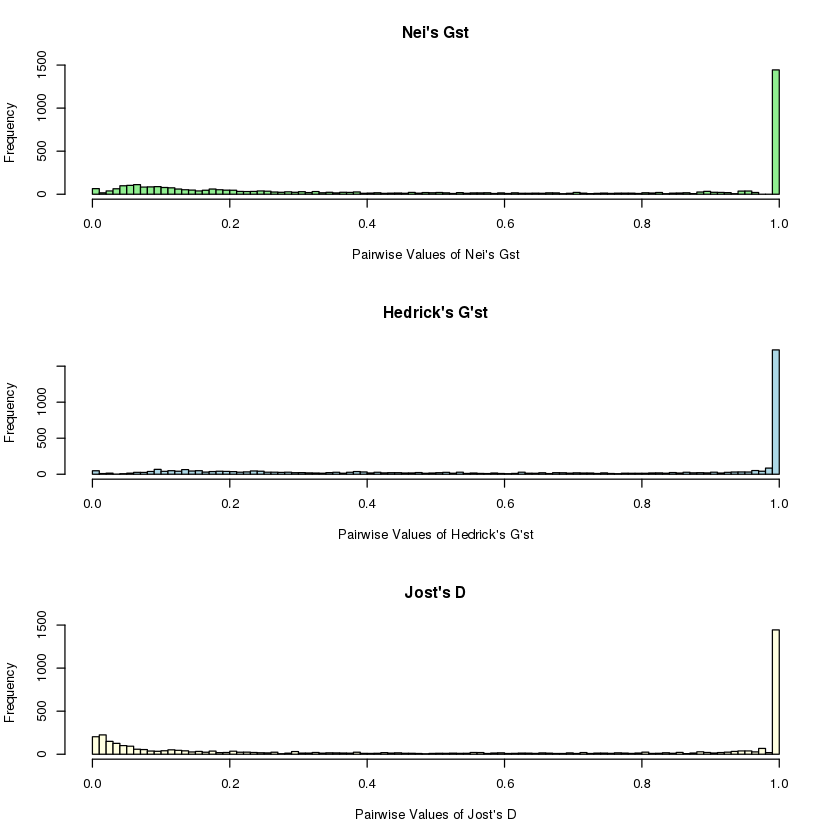

In [7]:
#Priting 3 figures arranged in 3 rows and 1 column
par(mfrow=c(3,1))
hist(obj_pairwiseGstnum, breaks=100, main="Nei's Gst", xlab="Pairwise Values of Nei's Gst", col='lightgreen');
hist(obj_pairwiseGstHnum, breaks=100, main="Hedrick's G'st", xlab="Pairwise Values of Hedrick's G'st", col='lightblue');
hist(obj_pairwiseDnum, breaks=100, main="Jost's D", xlab="Pairwise Values of Jost's D", col='lightyellow');

In [8]:
### DAPC
dapc1 <- dapc(data.genind, n.pca = 60, n.da = 2)
mycol <- c('darkblue','darkgreen')

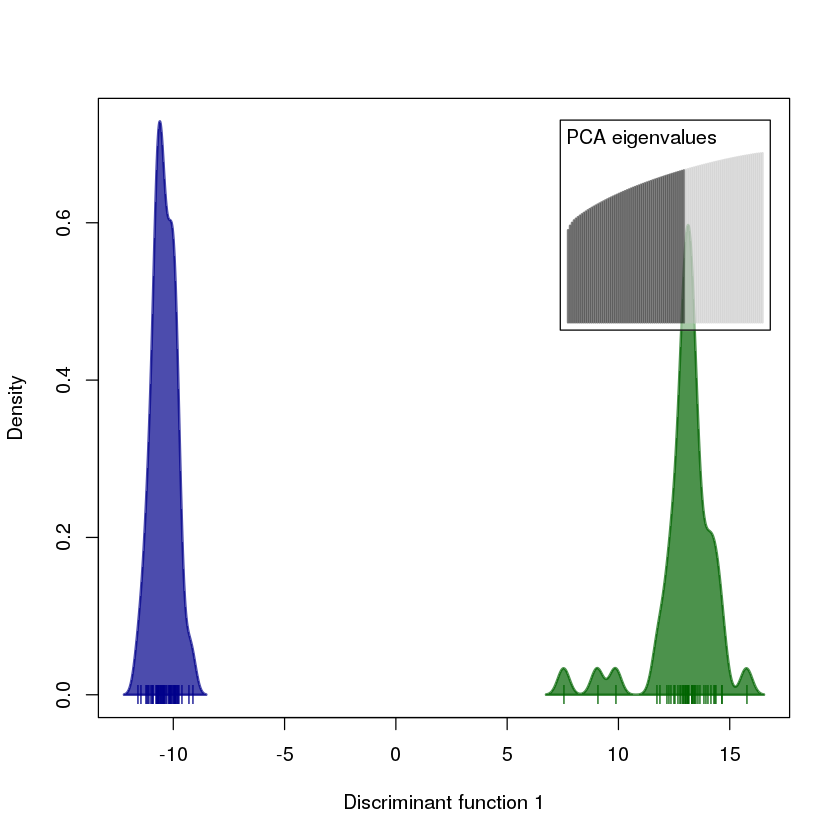

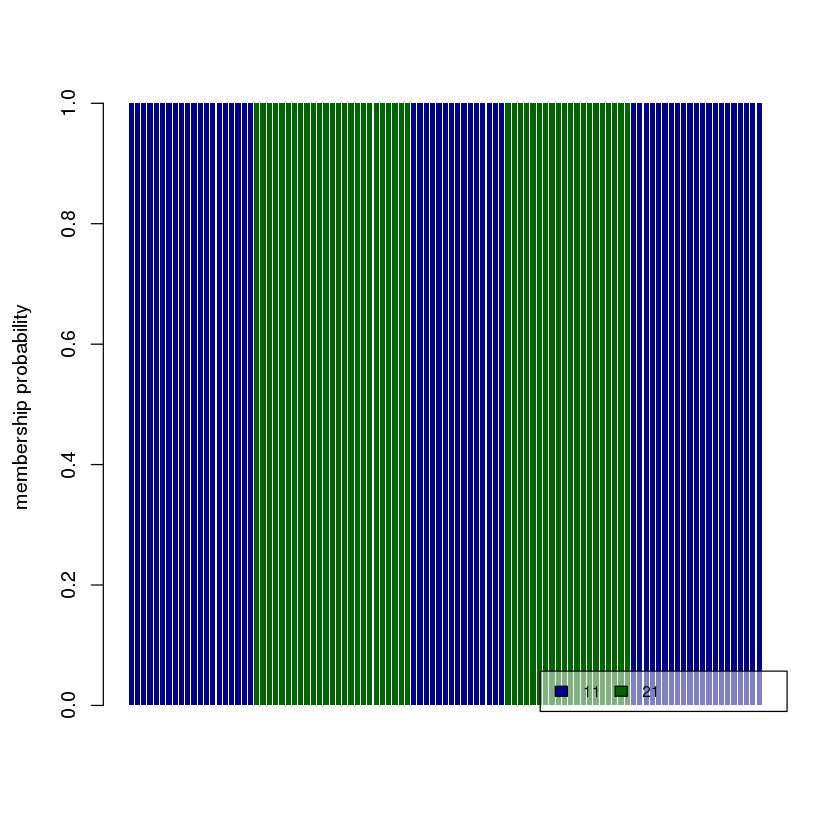

In [9]:
#print DAPC
scatter(dapc1, col = mycol, scree.pca = TRUE, posi.pca = "topright")
compoplot(dapc1, posi='bottomright', ncol = 1, col = mycol, cleg = 0.8, cex.names = 0.4)

In [10]:
# 11 = Usena antarctica
# 21 = Usena aurantiaco-atra

In [11]:
### save all in pdf
pdf("usnea_popgen.pdf")
par(mfrow=c(3,1))
hist(obj_pairwiseGstnum, breaks=100, main="Nei's Gst", xlab="Pairwise Values of Nei's Gst", col='lightgreen');
hist(obj_pairwiseGstHnum, breaks=100, main="Hedrick's G'st", xlab="Pairwise Values of Hedrick's G'st", col='lightblue');
hist(obj_pairwiseDnum, breaks=100, main="Jost's D", xlab="Pairwise Values of Jost's D", col='lightyellow');
par(mfrow=c(2,1))
scatter(dapc1, col = mycol, scree.pca = TRUE, posi.pca = "topright")
compoplot(dapc1, posi='bottomright', ncol = 1, col = mycol, cleg = 0.8, cex.names = 0.4)
dev.off()

png 
  2